In [2]:

import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D 
from keras.layers import Dropout 
from keras.utils import np_utils 
from keras.layers import Flatten
from keras.layers import Dense 
from keras.constraints import maxnorm
from keras.optimizers import SGD 

Using TensorFlow backend.


# Loading dataset

In [3]:
def get_annotations_map():
    valAnnotationsPath = 'C:/Users/xuxue/Downloads/assignment2/tiny-imagenet-200/tiny-imagenet-200/val/val_annotations.txt'
    valAnnotationsFile = open(valAnnotationsPath, 'r')
    valAnnotationsContents = valAnnotationsFile.read()
    valAnnotations = {}

    for line in valAnnotationsContents.splitlines():
        pieces = line.strip().split()
        valAnnotations[pieces[0]] = pieces[1]

    return valAnnotations

Loading 200 classes
loading training images...
finished loading training images
loading test images...
finished loading test images


TypeError: Invalid dimensions for image data

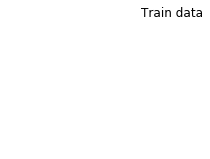

In [4]:
def load_images(path,num_classes):
    #Load images
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([num_classes*500,32,32,3],dtype='uint8')
    y_train=np.zeros([num_classes*500], dtype='uint8')

    trainPath=path+'/train'

    print('loading training images...');

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(os.path.join(trainPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=np.transpose(X,(0,1,2))
            y_train[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')

    val_annotations_map = get_annotations_map()

    X_test = np.zeros([num_classes*50,32,32,3],dtype='uint8')
    y_test = np.zeros([num_classes*50], dtype='uint8')


    print('loading test images...')

    i = 0
    valPath=path + '/val/images'
    for sChild in os.listdir(valPath):
        if val_annotations_map[sChild] in annotations.keys():
            sChildPath = os.path.join(valPath, sChild)
            X=np.array(Image.open(sChildPath))
            if len(np.shape(X))==2:
                X_test[i]=np.array([X,X,X])
            else:
                X_test[i]=np.transpose(X,(0,1,2))
            y_test[i]=annotations[val_annotations_map[sChild]]
            i+=1
        else:
            pass


    print('finished loading test images')#+str(i)

    return X_train,y_train,X_test,y_test

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    path='C:/Users/xuxue/Downloads/assignment2/tiny-imagenet-200/tiny-imagenet-200'
    X_train,y_train,X_test,y_test=load_images(path,200)#input data path & numbers of classes
    

    fig1 = plt.figure()
    fig1.suptitle('Train data')
    ax1 = fig1.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_train[0],(1,2,0)))
    print(y_train[0])
    ax2 = fig1.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_train[499],(1,2,0)))
    print(y_train[499])
    ax3 = fig1.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_train[500],(1,2,0)))
    print(y_train[500])
    ax4 = fig1.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_train[999],(1,2,0)))
    #print(y_train[999])
    #plt.show()

    fig2 = plt.figure()
    fig2.suptitle('Test data')
    ax1 = fig2.add_subplot(221)
    ax1.axis("off")
    ax1.imshow(np.transpose(X_test[0],(1,2,0)))
    print(y_test[0])
    ax2 = fig2.add_subplot(222)
    ax2.axis("off")
    ax2.imshow(np.transpose(X_test[49],(1,2,0)))
    print(y_test[49])
    ax3 = fig2.add_subplot(223)
    ax3.axis("off")
    ax3.imshow(np.transpose(X_test[50],(1,2,0)))
    print(y_test[50])
    ax4 = fig2.add_subplot(224)
    ax4.axis("off")
    ax4.imshow(np.transpose(X_test[99],(1,2,0)))


In [5]:
X_train.shape

(100000, 32, 32, 3)

In [6]:
y_train.shape

(100000,)

# Model

In [7]:
# normalize inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [8]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]


# Create the model 
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=(3, 32, 32), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (2, 2), activation='elu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2)))  
model.add(Flatten()) 
model.add(Dropout(0.2))  
model.add(Dense(512, activation='elu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

In [9]:
from keras.layers import Activation

In [10]:
from keras.layers import BatchNormalization

In [12]:
img_height, img_width, channel = X_train.shape[1],X_train.shape[2],X_train.shape[3]

In [13]:
#Instantiate an empty model
model = Sequential()
# model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
# for original Alexnet
model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# print the model summary
model.summary()

# Compile the model
#model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)         885120    
__________

In [ ]:

# Compile model e
epochs = 500
lrate = 0.01

In [ ]:
decay = lrate/epochs 
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 
print(model.summary())

### Fit the model 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64) 
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=2) 
print("Accuracy: %.2f%%" % (scores[1]*100))